In [81]:
from __future__ import division, print_function
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
imgcv = cv2.imread('/home/swagatam/cpp_test/wwsIP/practice/assignment2/box.png', 0)
img1 = cv2.imread('/home/swagatam/cpp_test/wwsIP/practice/assignment2/star.png', 0)

In [3]:
imgcv.shape

(480, 640)

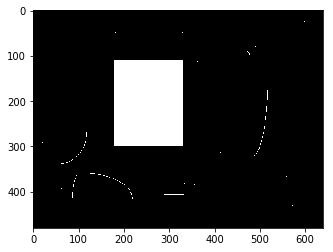

In [4]:
plt.imshow(imgcv, cmap = 'gray')

In [5]:
def create_grid(grid_dim, block_dim):
    r = 2 ** grid_dim
    c = r
    br = 2 ** block_dim
    bc = br
    
    grid = np.zeros((r,c))
    color = 0
    for i in range(0,r,br):
        color = 255 - color
        for j in range(0,c,bc):
            grid[i:i+br-1, j:j+bc-1] = color
            color = 255 - color
    
    return grid

In [173]:
grid = create_grid(10,7)

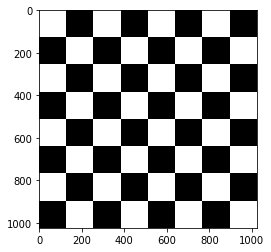

In [174]:
plt.imshow(grid, cmap = 'gray')

In [189]:
def isvalid(i, j, r, c):
    if i < 0 or j < 0 or i > r-1 or j > c-1:
        return 0
    return 1

def affine(img, matrix):
    res = np.zeros(img.shape)
    r, c = img.shape
    countval = 0
    countwhite = 0
    for i in range(r):
        for j in range(c):
            x = np.array([[i], [j], [1]])
            x_ = matrix.dot(x)
            i1, j1, k = x_[0,0], x_[1,0], x_[2,0]
            if k == 0:
                k = 0.0000000001
            i1 /= k
            j1 /= k
#             print('coordinate = ',i1,j1)
            i1, j1 = int(i1), int(j1)
#             print(i1,j1)
            if isvalid(i1,j1,r,c):
                countval += 1
                res[i1,j1] = img[i,j]
                if img[i,j] == 255:
#                     print('white coordinate = ',i1,j1)
                    countwhite += 1
    print('Total valid pixels = ', countval)
    print('Total pixels = ', r*c)
    print('Fraction of valid pixels = ',countval / (r * c))
    print('Total white pixels = ', countwhite)
    return res

def affine2(img, matrix):
    res = np.zeros(img.shape)
    res = np.zeros((3000,3000))
    r, c = img.shape
    countval = 0
    countwhite = 0
    for i in range(r):
        for j in range(c):
            x = np.array([[i], [j], [1]])
            x_ = matrix.dot(x)
            i1, j1, k = x_[0,0], x_[1,0], x_[2,0]
            if k == 0:
                k = 0.0000000001
            i1 /= k
            j1 /= k
            i1 *= 100
            j1 *= 100
#             print('coordinate = ',i1,j1)
            i1, j1 = int(i1) + 1500, int(j1) + 1500
#             print(i1,j1)
            if isvalid(i1,j1,3000,3000):
                countval += 1
                res[i1,j1] += 1
#                 if img[i,j] == 255:
#                     print('white coordinate = ',i1,j1)
#                     countwhite += 1
#     print('Total valid pixels = ', countval)
#     print('Total pixels = ', r*c)
#     print('Fraction of valid pixels = ',countval / (r * c))
#     print('Total white pixels = ', countwhite)
    return res

In [190]:
matrix = np.array([
    [1,1,0],
    [0,1,0],
    [0,0,1]
])
mat2 = np.array([
    [1,0,0],
    [0,1,0],
    [0.2,0.3,0.5]
])
translate = np.array([
    [1,0,1500],
    [0,1,1500],
    [0,0,1]
])

In [191]:
res1 = affine(grid,matrix)

Total valid pixels =  524800
Total pixels =  1048576
Fraction of valid pixels =  0.50048828125
Total white pixels =  258064


In [192]:
res2 = affine2(grid,mat2)

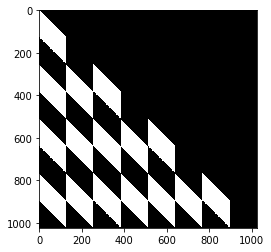

In [193]:
plt.imshow(res1, cmap = 'gray')

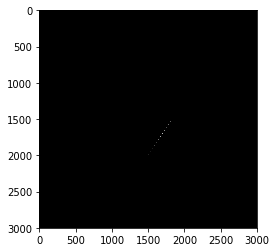

In [194]:
plt.imshow(res2, cmap = 'gray')
plt.imsave('homo.png', res2, cmap = 'gray')

In [187]:
res3 = affine(grid,translate)

Total valid pixels =  0
Total pixels =  1048576
Fraction of valid pixels =  0.0
Total white pixels =  0


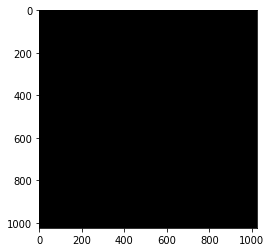

In [188]:
plt.imshow(res3, cmap = 'gray')

In [137]:
a = res1 == 255

In [138]:
b = np.where(a == True)

In [139]:
b

(array([   0,    0,    0, ..., 1009, 1009, 1009]),
 array([  0,   1,   2, ..., 128, 129, 130]))

In [10]:
a = np.zeros((5,5))

In [11]:
a[0:2, 2:4] = 1

In [12]:
a

array([[0., 0., 1., 1., 0.],
       [0., 0., 1., 1., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

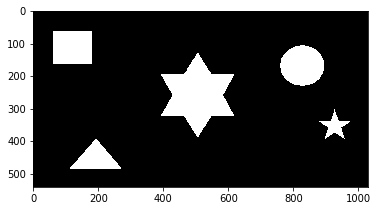

In [4]:
plt.imshow(img1, cmap = 'gray')

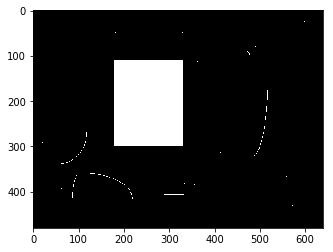

In [7]:
imgcv[:,200] = 0
plt.imshow(imgcv, cmap = 'gray')
plt.imsave('boxj.png', imgcv, cmap = 'gray')

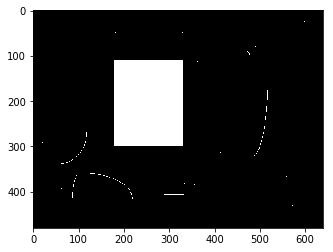

In [4]:
imgcv[200,:] = 0
plt.imshow(imgcv, cmap = 'gray')
plt.imsave('boxi.png', imgcv, cmap = 'gray')

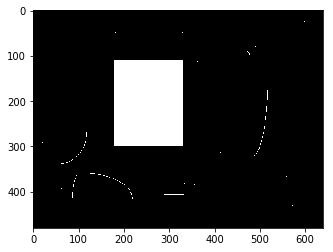

In [23]:
plt.imshow(imgcv, cmap = 'gray')
plt.imsave('box1.png', imgcv, cmap = 'gray')

In [41]:
theta = -np.pi / 18
rotate = np.array([
    [np.cos(theta), np.sin(theta)],
    [-np.sin(theta), np.cos(theta)]
])

affine = np.array([
    [0.7, 0.6],
    [0.3, 0.4]
])

print(rotate)

[[ 0.98480775 -0.17364818]
 [ 0.17364818  0.98480775]]


In [42]:
def isvalid(i, j, r, c):
    if i < 0 or j < 0 or i > r-1 or j > c-1:
        return 0
    return 1

In [43]:
r, c = img1.shape

In [44]:
rot = np.zeros(img1.shape)
# rot = np.zeros((2*r, 2*c))
for i in range(r):
    for j in range(c):
        P = np.array([[i], [j]])
        P_ = rotate.dot(P)
        i1, j1 = int(P_[0,0]), int(P_[1,0])
        if isvalid(i1,j1,r,c):
            rot[i1,j1] = img1[i,j]

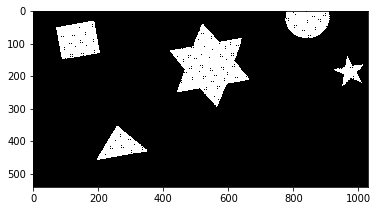

In [45]:
plt.imshow(rot, cmap = 'gray')

In [50]:
r, c = imgcv.shape
rot = np.zeros((r,c))
for i in range(r):
    for j in range(c):
        P = np.array([[i], [j]])
        P_ = rotate.dot(P)
        i1, j1 = int(P_[0,0]), int(P_[1,0])
        if isvalid(i1,j1,r,c):
            rot[i1,j1] = imgcv[i,j]

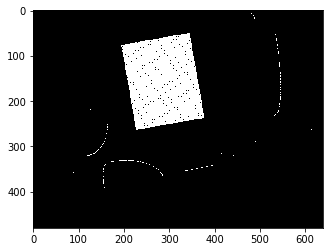

In [51]:
plt.imshow(rot, cmap = 'gray')

In [31]:
rot.shape

(480, 640)

In [15]:
P = np.array([[1], [1]])

In [26]:
P

array([[1],
       [1]])

In [27]:
rotate.dot(P)

array([[1.41421356e+00],
       [1.11022302e-16]])

In [24]:
x

1

In [25]:
y

1